# Q8: Ito diffusion stochastic processes

Assume $(S_t, X_t)_{t \geq 0}$ are two Itô diffusion stochastic processes on the probability space $(\Omega, \mathcal{F}, \mathbb{P})$ adapted to $\mathcal{F}_t$, which are defined by the following Stochastic Differential Equations (SDEs):

\begin{aligned}
    dS_t &= \mu S_t \, dt + \sigma^S S_t \, dW_t^S \\
    dX_t &= \sigma^X \, dW_t^X \\
    dW_t^X \, dW_t^S &= \rho \, dt
\end{aligned}

Subject to:

\begin{aligned}
    \mu &= 0.01 \\
    \sigma^S &= 0.2 \\
    \sigma^X &= 0.3 \\
    \rho &= 0.6 \\
    S_0 &= 1 \\
    X_0 &= 1
\end{aligned}

and $W_t^S, W_t^X$ are standard Wiener processes on $(\Omega, \mathcal{F}, \mathbb{P})$.

Please write a code for a Monte-Carlo simulation of $(S_t, X_t)_{t \geq 0}$ in order to retrieve the expected value of $\max(S_T, X_T)$ at $T = 3$.

## Housekeeping

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
def generate_simulation(init, mu, sigma_S, sigma_X, rho, dt, n_steps) -> tuple:
    """Generate a simulation of the correlated S and X processes.

    :param init: Initial conditions
    :param mu:
    :param sigma_S:
    :param sigma_X:
    :param rho:
    :param dt:
    :param n_steps:
    :return: Simulated S and X processes
    """
    # Initialize arrays
    S = np.zeros(n_steps + 1)
    X = np.zeros(n_steps + 1)

    # Initial conditions
    S[0] = init[0]
    X[0] = init[1]

    # Iterate over each time step
    for i in range(n_steps):

        # Generate correlated Wiener increments
        dW_S = np.sqrt(dt) * np.random.normal()
        Z = np.sqrt(dt) * np.random.normal()
        dW_X = rho * dW_S + np.sqrt(1 - rho ** 2) * Z

        # Update S
        S[i + 1] = S[i] + mu * S[i] * dt + sigma_S * S[i] * dW_S + 0.5 * sigma_S**2 * S[i] * ((dW_S) ** 2 - dt)

        # Update X
        X[i + 1] = X[i] + sigma_X * dW_X + 0.5 * sigma_X**2 * ((dW_X) ** 2 - dt)

    return S, X

## Parameters and variables

In [3]:
# Parameters
mu = 0.01
sigma_S = 0.2
sigma_X = 0.3
rho = 0.6
T = 3
dt = 0.05  # 0.5  # 0.01
n_steps = int(T / dt)
n_sim = 3000

In [4]:
# Initialize arrays
S = np.zeros(n_steps + 1)
X = np.zeros(n_steps + 1)
t = np.linspace(0, T, n_steps + 1)

# Initialize arrays for simulations
sim_S = np.zeros((n_sim, n_steps + 1))
sim_X = np.zeros((n_sim, n_steps + 1))
max_S_X = np.zeros((n_sim, n_steps + 1))

In [5]:
# Initial conditions
S[0] = 1.0
X[0] = 0.0

## Simulations 

In [6]:
# generate simulations
for s in range(n_sim):
    S, X = generate_simulation([1.0, 0.0], mu, sigma_S, sigma_X, rho, dt, n_steps)
    sim_S[s] = S
    sim_X[s] = X

    # concatenate the two arrays
    max_S_X[s] = np.amax(np.stack((S, X), axis=1), axis=1)

In [7]:
# mean of the max(S, X) at each time step
mean_max_S_X = np.mean(max_S_X, axis=0)

In [15]:
print(f'Estimated mean at the last time period (T=3) is {mean_max_S_X[-1]:.3f}')

Estimated mean at the last time period (T=3) is 1.033


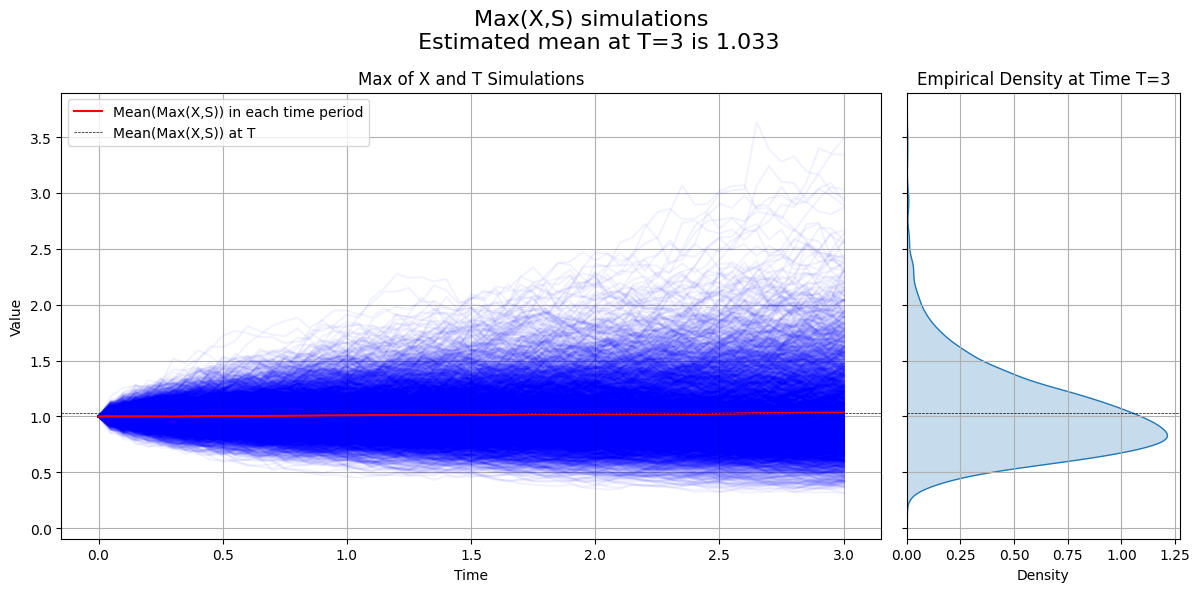

In [8]:
# Plot the results
fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(12, 6), sharey=True)
plt.suptitle(f'Max(X,S) simulations \n Estimated mean at T={T} is {mean_max_S_X[-1]:.3f}', fontsize=16)

ax1.plot(t, max_S_X.T, color='blue', alpha=0.05)
ax1.plot(t, mean_max_S_X, color='red', label='Mean(Max(X,S)) in each time period')
ax1.set_title('Max of X and T Simulations')
ax1.set_xlabel('Time')
ax1.set_ylabel('Value')
ax1.grid(True)

# empirical density at time T using sns kdeplot on ax2
sns.kdeplot(data=pd.DataFrame(max_S_X[:, -1], columns=['y']), y='y', ax=ax2, fill=True)  #, vertical=True)
ax2.set_title(f'Empirical Density at Time T={T}')
ax2.grid(True)

# horizontal line at mean in the last time step
ax1.axhline(y=mean_max_S_X[-1], color='black', linestyle='--', label='Mean(Max(X,S)) at T', linewidth=0.5)
ax2.axhline(y=mean_max_S_X[-1], color='black', linestyle='--', linewidth=0.5)

ax1.legend()
plt.tight_layout()
plt.show()

## Convergence

The following plot shows how our estimate of Max(X,S) at time T=3 converges with increasing number of simulations.

In [9]:
# cumulative mean of the max(S, X) at each simulation (= MC estimation convergence)
cum_mean_max_S_X = np.cumsum(max_S_X, axis=0) / np.arange(1, n_sim + 1)[:, None]

# convergence at T
mean_convergence_T = cum_mean_max_S_X[:, -1]

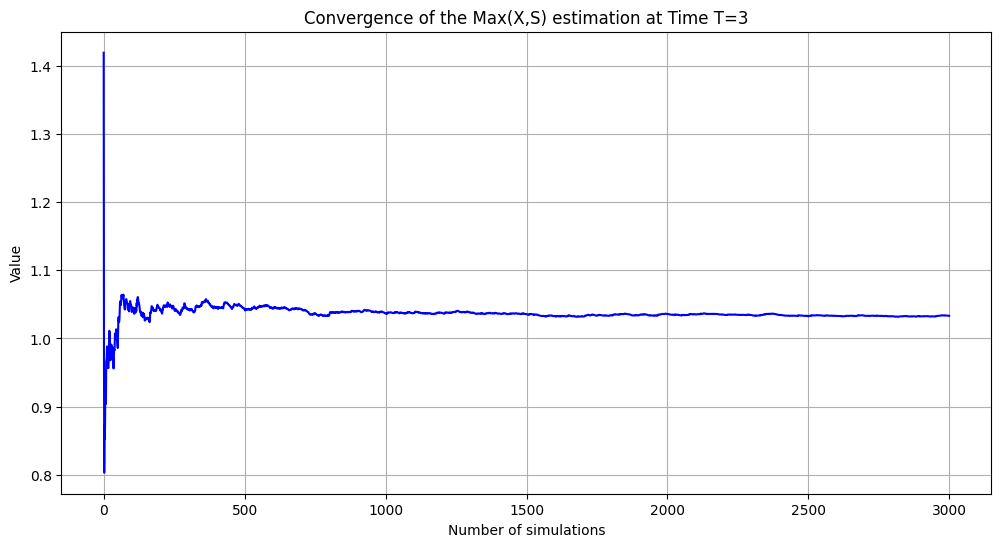

In [10]:
# plot the convergence of the mean at time T
plt.figure(figsize=(12, 6))
plt.plot(mean_convergence_T, color='blue')
plt.title(f'Convergence of the Max(X,S) estimation at Time T={T}')
plt.xlabel('Number of simulations')
plt.ylabel('Value')
plt.grid(True)
plt.show()